In [ ]:
from numpy.random import seed
seed(101)
import tensorflow
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras import backend as K

import keras
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.layers import Input, Conv2D, MaxPooling2D, LSTM, Flatten, Dense,Dropout
import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [ ]:
base_dir="/content/drive/MyDrive/base_dir"
train_dir=os.path.join(base_dir, 'train_dir')
print(os.listdir(train_dir))
Val_dir=os.path.join(base_dir, 'val_dir')
print(os.listdir(Val_dir))

['nv', 'vasc', 'mel', 'bkl', 'bcc', 'df', 'akiec']
['df', 'vasc', 'bkl', 'mel', 'bcc', 'nv', 'akiec']


In [ ]:
train_nv_images=os.listdir(os.path.join(train_dir,'nv'))
print("Train NV Images:",train_nv_images[:10])
train_mel_images=os.listdir(os.path.join(train_dir,'mel'))
print("Train MEL Images:",train_mel_images[:10])
train_bkl_images=os.listdir(os.path.join(train_dir,'bkl'))
print("Train BKL Images:",train_bkl_images[:10])
train_bcc_images=os.listdir(os.path.join(train_dir,'bcc'))
print("Train BCC Images:",train_bcc_images[:10])
train_akiec_images=os.listdir(os.path.join(train_dir,'akiec'))
print("Train AKIEC Images:",train_akiec_images[:10])
train_vasc_images=os.listdir(os.path.join(train_dir,'vasc'))
print("Train VASC Images:",train_vasc_images[:10])
train_df_images=os.listdir(os.path.join(train_dir,'df'))
print("Train DF Images:",train_df_images[:10])

Train NV Images: ['ISIC_0029978.jpg', 'ISIC_0026655.jpg', 'ISIC_0024836.jpg', 'ISIC_0029898.jpg', 'ISIC_0026885.jpg', 'ISIC_0026043.jpg', 'ISIC_0026293.jpg', 'ISIC_0024352.jpg', 'ISIC_0024599.jpg', 'ISIC_0026712.jpg']
Train MEL Images: ['ISIC_0025751.jpg', 'ISIC_0029081.jpg', 'ISIC_0027125.jpg', 'ISIC_0031642.jpg', 'ISIC_0030060.jpg', 'ISIC_0025955.jpg', 'ISIC_0026150.jpg', 'ISIC_0026892.jpg', 'ISIC_0030171.jpg', 'ISIC_0025277.jpg']
Train BKL Images: ['ISIC_0026955.jpg', 'ISIC_0031691.jpg', 'ISIC_0026637.jpg', 'ISIC_0031029.jpg', 'ISIC_0027310.jpg', 'ISIC_0029396.jpg', 'ISIC_0031159.jpg', 'ISIC_0025016.jpg', 'ISIC_0025076.jpg', 'ISIC_0024981.jpg']
Train BCC Images: ['ISIC_0028155.jpg', 'ISIC_0027526.jpg', 'ISIC_0031513.jpg', 'ISIC_0032384.jpg', 'ISIC_0027135.jpg', 'ISIC_0026760.jpg', 'ISIC_0027146.jpg', 'ISIC_0027976.jpg', 'ISIC_0029193.jpg', 'ISIC_0034093.jpg']
Train AKIEC Images: ['ISIC_0029659.jpg', 'ISIC_0030297.jpg', 'ISIC_0024562.jpg', 'ISIC_0031929.jpg', 'ISIC_0027795.jpg', 'ISI

In [ ]:
Val_nv_images=os.listdir(os.path.join(Val_dir,'nv'))
print("Val NV Images",Val_nv_images[:5])
Val_mel_images=os.listdir(os.path.join(Val_dir,'mel'))
print("Val MEL Images",Val_mel_images[:5])
Val_bkl_images=os.listdir(os.path.join(Val_dir,'bkl'))
print("Val BKL Images",Val_bkl_images[:5])
Val_bcc_images=os.listdir(os.path.join(Val_dir,'bcc'))
print("Val BCC Images",Val_bcc_images[:5])
Val_akiec_images=os.listdir(os.path.join(Val_dir,'akiec'))
print("Val AKIEC Images",Val_akiec_images[:5])
Val_vasc_images=os.listdir(os.path.join(Val_dir,'vasc'))
print("Val VASC Images",Val_vasc_images[:5])
Val_df_images=os.listdir(os.path.join(Val_dir,'df'))
print("Val DF Images",Val_df_images[:5])

Val NV Images ['ISIC_0027347.jpg', 'ISIC_0027301.jpg', 'ISIC_0026733.jpg', 'ISIC_0031588.jpg', 'ISIC_0027886.jpg']
Val MEL Images ['ISIC_0028228.jpg', 'ISIC_0024864.jpg', 'ISIC_0025616.jpg', 'ISIC_0031999.jpg', 'ISIC_0034049.jpg']
Val BKL Images ['ISIC_0025830.jpg', 'ISIC_0027219.jpg', 'ISIC_0026556.jpg', 'ISIC_0025777.jpg', 'ISIC_0025374.jpg']
Val BCC Images ['ISIC_0027786.jpg', 'ISIC_0032439.jpg', 'ISIC_0030511.jpg', 'ISIC_0029220.jpg', 'ISIC_0028556.jpg']
Val AKIEC Images ['ISIC_0027172.jpg', 'ISIC_0031191.jpg', 'ISIC_0024707.jpg', 'ISIC_0026212.jpg', 'ISIC_0031927.jpg']
Val VASC Images ['ISIC_0026490.jpg', 'ISIC_0025612.jpg', 'ISIC_0032409.jpg', 'ISIC_0029439.jpg', 'ISIC_0031201.jpg']
Val DF Images ['ISIC_0025903.jpg', 'ISIC_0028651.jpg', 'ISIC_0031799.jpg', 'ISIC_0027598.jpg', 'ISIC_0025594.jpg']


In [ ]:
train_nv_path=[os.path.join(os.path.join(train_dir,'nv'), fname) for fname in train_nv_images]
print("Train NV images Paths:",train_nv_path[:10])
train_mel_path=[os.path.join(os.path.join(train_dir,'mel'), fname) for fname in train_mel_images]
print("Train Mel images Paths:",train_mel_path[:10])
train_bkl_path=[os.path.join(os.path.join(train_dir,'bkl'), fname) for fname in train_bkl_images]
print("Train BKL images Paths:",train_bkl_path[:10])
train_bcc_path=[os.path.join(os.path.join(train_dir,'bcc'), fname) for fname in train_bcc_images]
print("Train BCC images Paths:",train_bcc_path[:10])
train_akiec_path=[os.path.join(os.path.join(train_dir,'akiec'), fname) for fname in train_akiec_images]
print("Train AKIEC images Paths:",train_akiec_path[:10])
train_vasc_path=[os.path.join(os.path.join(train_dir,'vasc'), fname) for fname in train_vasc_images]
print("Train VASC images Paths:",train_vasc_path[:10])
train_df_path=[os.path.join(os.path.join(train_dir,'df'), fname) for fname in train_df_images]
print("Train DF images Paths:",train_df_path[:10])

Train NV images Paths: ['/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0029978.jpg', '/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0026655.jpg', '/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0024836.jpg', '/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0029898.jpg', '/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0026885.jpg', '/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0026043.jpg', '/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0026293.jpg', '/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0024352.jpg', '/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0024599.jpg', '/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0026712.jpg']
Train Mel images Paths: ['/content/drive/MyDrive/base_dir/train_dir/mel/ISIC_0025751.jpg', '/content/drive/MyDrive/base_dir/train_dir/mel/ISIC_0029081.jpg', '/content/drive/MyDrive/base_dir/train_dir/mel/ISIC_0027125.jpg', '/content/drive/MyDrive/base_dir/train_dir/mel/ISIC_0031642.jpg', '/content/drive/MyDrive/base_dir/trai

In [ ]:
Val_nv_path=[os.path.join(os.path.join(Val_dir,'nv'), fname) for fname in Val_nv_images]
print("Val NV images Paths:",Val_nv_path[:5])
Val_mel_path=[os.path.join(os.path.join(Val_dir,'mel'), fname) for fname in Val_mel_images]
print("Val Mel images Paths:",Val_mel_path[:5])
Val_bkl_path=[os.path.join(os.path.join(Val_dir,'bkl'), fname) for fname in Val_bkl_images]
print("Val BKL images Paths:",Val_bkl_path[:5])
Val_bcc_path=[os.path.join(os.path.join(Val_dir,'bcc'), fname) for fname in Val_bcc_images]
print("Val BCC images Paths:",Val_bcc_path[:5])
Val_akiec_path=[os.path.join(os.path.join(Val_dir,'akiec'), fname) for fname in Val_akiec_images]
print("Val AKIEC images Paths:",Val_akiec_path[:5])
Val_vasc_path=[os.path.join(os.path.join(Val_dir,'vasc'), fname) for fname in Val_vasc_images]
print("Val VASC images Paths:",Val_vasc_path[:5])
Val_df_path=[os.path.join(os.path.join(Val_dir,'df'), fname) for fname in Val_df_images]
print("Val DF images Paths:",Val_df_path[:5])

Val NV images Paths: ['/content/drive/MyDrive/base_dir/val_dir/nv/ISIC_0027347.jpg', '/content/drive/MyDrive/base_dir/val_dir/nv/ISIC_0027301.jpg', '/content/drive/MyDrive/base_dir/val_dir/nv/ISIC_0026733.jpg', '/content/drive/MyDrive/base_dir/val_dir/nv/ISIC_0031588.jpg', '/content/drive/MyDrive/base_dir/val_dir/nv/ISIC_0027886.jpg']
Val Mel images Paths: ['/content/drive/MyDrive/base_dir/val_dir/mel/ISIC_0028228.jpg', '/content/drive/MyDrive/base_dir/val_dir/mel/ISIC_0024864.jpg', '/content/drive/MyDrive/base_dir/val_dir/mel/ISIC_0025616.jpg', '/content/drive/MyDrive/base_dir/val_dir/mel/ISIC_0031999.jpg', '/content/drive/MyDrive/base_dir/val_dir/mel/ISIC_0034049.jpg']
Val BKL images Paths: ['/content/drive/MyDrive/base_dir/val_dir/bkl/ISIC_0025830.jpg', '/content/drive/MyDrive/base_dir/val_dir/bkl/ISIC_0027219.jpg', '/content/drive/MyDrive/base_dir/val_dir/bkl/ISIC_0026556.jpg', '/content/drive/MyDrive/base_dir/val_dir/bkl/ISIC_0025777.jpg', '/content/drive/MyDrive/base_dir/val_dir/

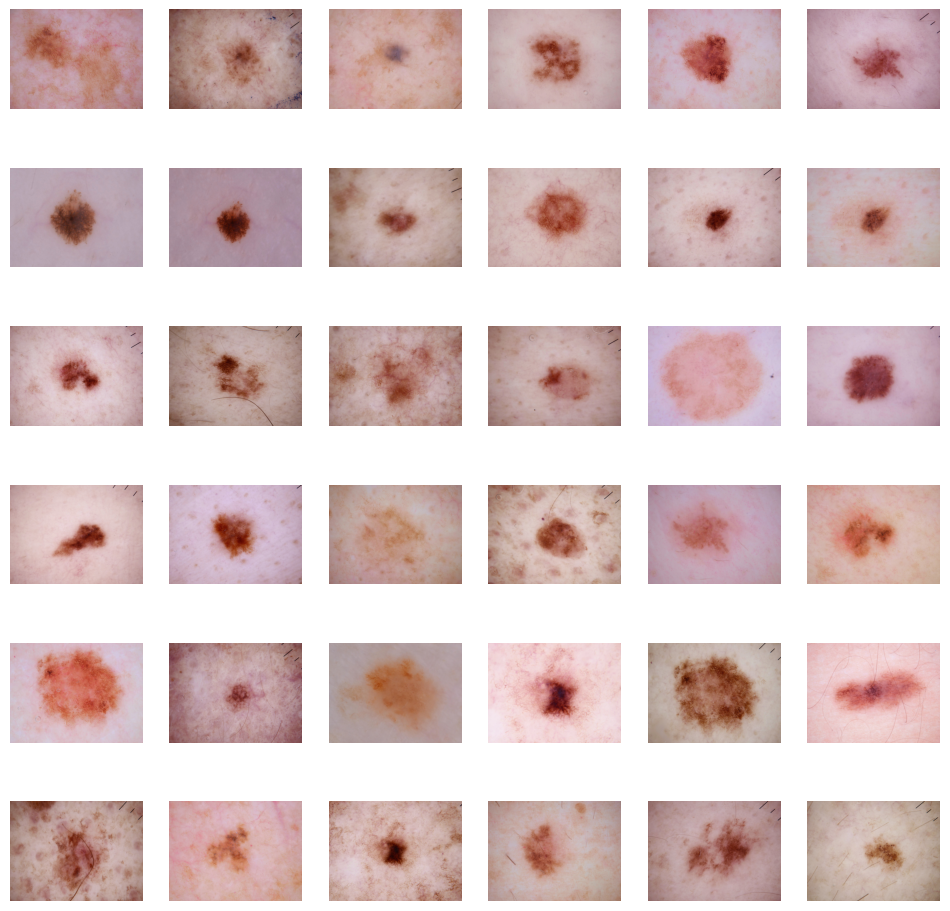

In [ ]:
plt.figure(figsize = (12,12))
i = 1
for path in train_nv_path[:36]:
  plt.subplot(6,6,i)
  plt.axis('off')
  nv_image = mpimg.imread(path)
  plt.imshow(nv_image)
  i += 1


## Data Augmentataion

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1 / 255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (300,300),
        batch_size = 64,
        class_mode = 'categorical'
)

Found 9080 images belonging to 7 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1 / 255)
val_generator = val_datagen.flow_from_directory(
        Val_dir,
        target_size = (300,300),
        batch_size = 64,
        class_mode = 'categorical'
)

Found 938 images belonging to 7 classes.


In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 3,
                                            factor = 0.5,
                                            min_lr = 0.00001)

In [ ]:
import keras

# Create the CNN model
model = keras.Sequential()

# Add the convolutional layers
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Reshape((16, 16 * 512)))

# Add the RNN layer
model.add(keras.layers.LSTM(8, return_sequences=False))

# Add the dense layer

model.add(keras.layers.Dense(7, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 149, 149, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 147, 147, 128)     73856     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 35, 35, 256)    

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 5,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)

Epoch 1/5
71/71 [==============================] - 358s 5s/step - loss: 1.1590 - accuracy: 0.6561 - val_loss: 0.8674 - val_accuracy: 0.8006 - lr: 5.0000e-04
Epoch 2/5
71/71 [==============================] - 402s 6s/step - loss: 1.1589 - accuracy: 0.6561 - val_loss: 0.8686 - val_accuracy: 0.8006 - lr: 5.0000e-04
Epoch 3/5
71/71 [==============================] - 351s 5s/step - loss: 1.1588 - accuracy: 0.6561 - val_loss: 0.8672 - val_accuracy: 0.8006 - lr: 5.0000e-04
Epoch 4/5
71/71 [==============================] - 350s 5s/step - loss: 1.1588 - accuracy: 0.6561 - val_loss: 0.8666 - val_accuracy: 0.8006 - lr: 5.0000e-04
Epoch 5/5
71/71 [==============================] - 346s 5s/step - loss: 1.1587 - accuracy: 0.6561 - val_loss: 0.8670 - val_accuracy: 0.8006 - lr: 2.5000e-04


In [ ]:
# Evaluate the model
model.evaluate(val_generator)

8/8 [==============================] - 17s 2s/step - loss: 0.8670 - accuracy: 0.8006


[0.8669809699058533, 0.8006396293640137]

In [ ]:
!mkdir -p saved_model

In [ ]:
model.save('saved_model/hybrid')

In [ ]:
#Model

model = tensorflow.keras.models.Sequential()
model.add(Conv2D(64, (5,5), activation = 'relu', input_shape = (300,300,3)))#300x300(actual size =(450,600))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))


In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 296, 296, 64)      4864      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 148, 148, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 35, 35, 256)    

In [ ]:
# optimizer = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model.compile(optimizer = 'adam',
               loss = tensorflow.keras.losses.categorical_crossentropy,
               metrics = ['accuracy'])

## Results

In [ ]:
new_model=tensorflow.keras.models.load_model('/content/drive/MyDrive/model.h5')
new_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 296, 296, 64)      4864      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 148, 148, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 35, 35, 256)    

In [ ]:
new_model.evaluate(val_generator)

8/8 [==============================] - 17s 2s/step - loss: 0.8670 - accuracy: 0.8006


[0.8669809699058533, 0.8006396293640137]

In [ ]:
# Flow the training data from a directory
train_data_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

# Retrieve the class indexes
class_indexes = train_data_flow.class_indices

# Print the class indexes
print("Class Indexes:", class_indexes)

Found 4085 images belonging to 7 classes.
Class Indexes: {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [ ]:
classes=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [ ]:
def preprocess_image(image_path):
  plt.imshow(mpimg.imread(image_path))
  image = Image.open(image_path)
  image = image.resize((300, 300))  # Resize the image to match the input size of your model
  image = np.array(image)
  image = np.expand_dims(image, axis=0)  # Add an extra dimension to match the model's expected input shape
  return image

## Skin Lesions labels are:

### nv

Melanocytic nevi are benign neoplasms of melanocytes and appear in a myriad of variants, which all are included in our series. The variants may differ significantly from a dermatoscopic point of view. [6705 images]

### mel

Melanoma is a malignant neoplasm derived from melanocytes that may appear in different variants. If excised in an early stage it can be cured by simple surgical excision. Melanomas can be invasive or non-invasive (in situ). We included all variants of melanoma including melanoma in situ, but did exclude non-pigmented, subungual, ocular or mucosal melanoma. [1113 images]

### bkl

"Benign keratosis" is a generic class that includes seborrheic ker- atoses ("senile wart"), solar lentigo - which can be regarded a flat variant of seborrheic keratosis - and lichen-planus like keratoses (LPLK), which corresponds to a seborrheic keratosis or a solar lentigo with inflammation and regression [22]. The three subgroups may look different dermatoscop- ically, but we grouped them together because they are similar biologically and often reported under the same generic term histopathologically. From a dermatoscopic view, lichen planus-like keratoses are especially challeng- ing because they can show morphologic features mimicking melanoma [23] and are often biopsied or excised for diagnostic reasons. [1099 images]

### bcc

Basal cell carcinoma is a common variant of epithelial skin cancer that rarely metastasizes but grows destructively if untreated. It appears in different morphologic variants (flat, nodular, pigmented, cystic, etc) [21], which are all included in this set. [514 images]

### akiec

Actinic Keratoses (Solar Keratoses) and intraepithelial Carcinoma (Bowen’s disease) are common non-invasive, variants of squamous cell car- cinoma that can be treated locally without surgery. Some authors regard them as precursors of squamous cell carcinomas and not as actual carci- nomas. There is, however, agreement that these lesions may progress to invasive squamous cell carcinoma - which is usually not pigmented. Both neoplasms commonly show surface scaling and commonly are devoid of pigment. Actinic keratoses are more common on the face and Bowen’s disease is more common on other body sites. Because both types are in- duced by UV-light the surrounding skin is usually typified by severe sun damaged except in cases of Bowen’s disease that are caused by human papilloma virus infection and not by UV. Pigmented variants exists for Bowen’s disease [19] and for actinic keratoses [20]. Both are included in this set. [327 images]

### vasc

Vascular skin lesions in the dataset range from cherry angiomas to angiokeratomas [25] and pyogenic granulomas [26]. Hemorrhage is also included in this category. [142 images]

### df

Dermatofibroma is a benign skin lesion regarded as either a benign proliferation or an inflammatory reaction to minimal trauma. It is brown often showing a central zone of fibrosis dermatoscopically [24]. [115 images]

[Total images = 10015]

## Confusion matrix

In [ ]:
import numpy
from sklearn import metrics

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    Val_dir, # Put your path here
     target_size=(300,300),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

Found 938 images belonging to 7 classes.


<ipython-input-125-8e664cb19538>:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       akiec       0.05      0.12      0.07        26
         bcc       0.14      0.67      0.24        30
         bkl       0.12      0.01      0.02        75
          df       0.12      0.83      0.20         6
         mel       0.00      0.00      0.00        39
          nv       0.92      0.83      0.87       751
        vasc       0.56      0.45      0.50        11

    accuracy                           0.70       938
   macro avg       0.27      0.42      0.27       938
weighted avg       0.76      0.70      0.72       938



## Prediction

1/1 [==============================] - 9s 9s/step
nv


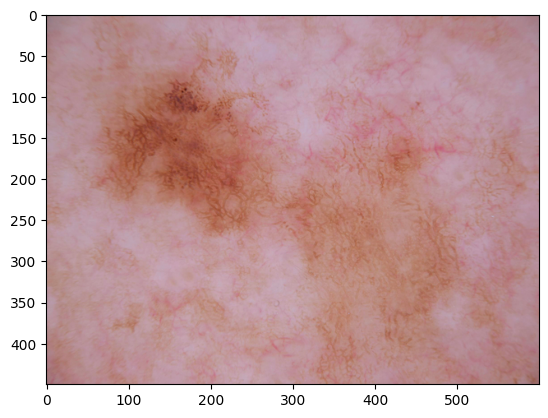

In [ ]:
res=np.argmax(new_model.predict(preprocess_image("/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0029978.jpg")))
print("Lesion -->",classes[res])

1/1 [==============================] - 0s 39ms/step
Lesion --> nv


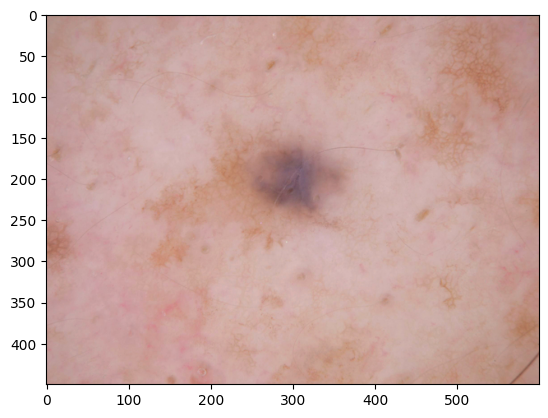

In [ ]:
res=np.argmax(new_model.predict(preprocess_image("/content/drive/MyDrive/base_dir/train_dir/nv/ISIC_0024836.jpg")))
print("Lesion -->",classes[res])

1/1 [==============================] - 0s 27ms/step
Lesion --> mel


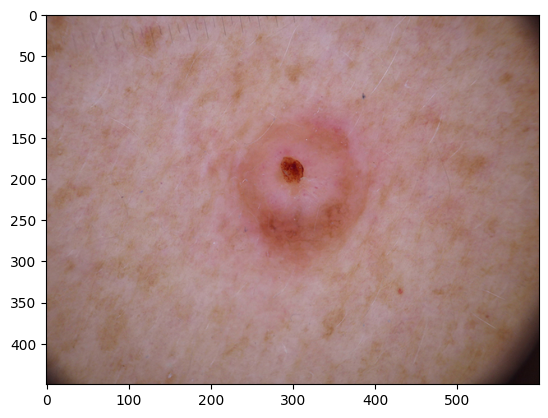

In [ ]:
res=np.argmax(new_model.predict(preprocess_image("/content/drive/MyDrive/base_dir/train_dir/mel/ISIC_0030089.jpg")))
print("Lesion -->",classes[res])

In [ ]:
res=np.argmax(new_model.predict(preprocess_image("/content/drive/MyDrive/base_dir/val_dir/bcc/ISIC_0027786.jpg")))
print("Lesion -->",classes[res])

In [ ]:
## Experiment
new_model=tensorflow.keras.models.load_model('/content/drive/MyDrive/Final_Hybrid_model.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 296, 296, 64)      4864      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 148, 148, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 256)     

In [ ]:
new_model.evaluate(val_generator)

15/15 [==============================] - 15s 1s/step - loss: 0.4996 - accuracy: 0.8316


[0.4996263384819031, 0.831556499004364]

classes=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

1/1 [==============================] - 1s 583ms/step
Lesion --> bcc


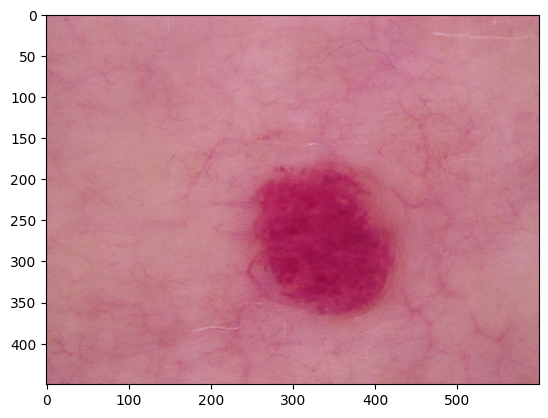

In [ ]:
res=np.argmax(new_model.predict(preprocess_image("/content/drive/MyDrive/base_dir/val_dir/vasc/ISIC_0026490.jpg")))
print("Lesion -->",classes[res])

1/1 [==============================] - 0s 162ms/step
Lesion --> nv


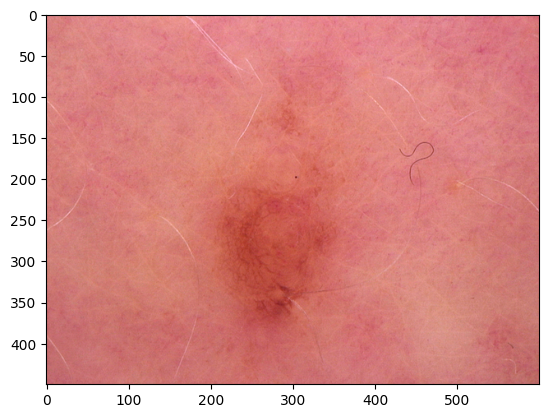

1/1 [==============================] - 0s 223ms/step
Lesion --> df


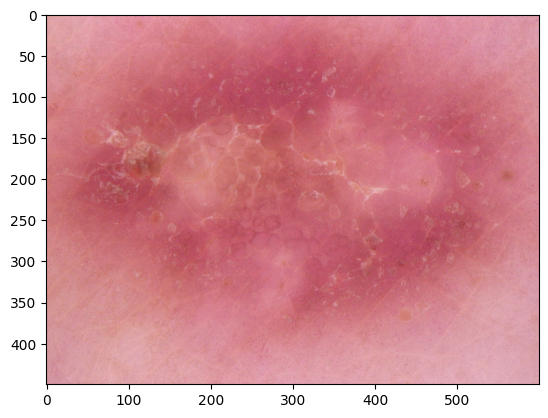